# Présentation générale du jeu de données

Installation des différents packages :

requirement.txt

Chargement de la librairie Panda qui permet de manipuler des données dans des dataframes notamment

In [116]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import folium
import json

import de nos données csv

In [53]:
data = pd.read_csv("p2-arbres-fr.csv", sep=";")

Visualisation des 5 premieres lignes de notre jeu de données

In [3]:
data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [16]:
data.tail(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856


Regardons le nombre de lignes et le nombre de colonnes du jeu de données

In [4]:
data.shape

(200137, 18)

Regardons les types des colonnes et le nombre de lignes non vides

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [34]:
list(data)

['id',
 'type_emplacement',
 'domanialite',
 'arrondissement',
 'complement_addresse',
 'numero',
 'lieu',
 'id_emplacement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

Regardons s'il y a des doublons (lignes identiques)

In [20]:
len(data.id.unique())

200137

In [22]:
len(data.id)

200137

On n'a donc pas de doublons.

Regardons les données manquantes

In [5]:
data.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [ ]:
Nous observons des valeurs manquantes. Regardons plus précisément ceci en traçant une matrice.

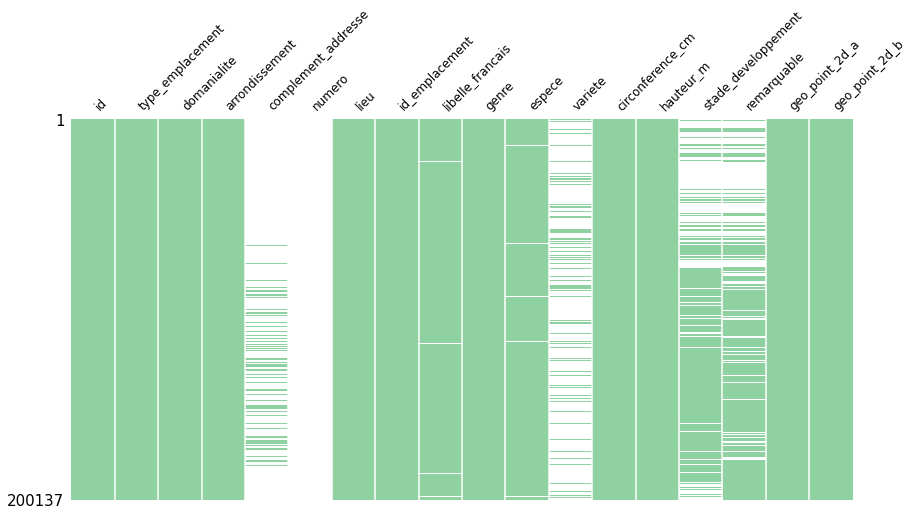

In [23]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

On voit que la colonne "numero" n'a pas de données.
La colonne complément d'adresse n'a que très peu de données renseignées mais ceci parait logique. 
Nous avons les coordonnées des points. Donc il ne semble pas utile de conserver les colonnes "complement_adresse" et "numero".


In [54]:
del data['numero']

In [55]:
del data['complement_addresse']

Il manque quelques données concernant la colonne "libelle_francais" qui est le nom de l'arbre, de même pour la colonne "espèce", mais nous avons le genre. Nous pouvons pour l'instant conserver ces données.

On n'a pas beaucoup de données pour la colonne "variete", il faudra donc étudier de plus près cette colonne.

Il manque aussi beaucoup de données sur les colonnes stade_developpement et sur la colonne remarquable.
Regardons les valeurs uniques de ces colonnes

Commençons par la colonne "remarquable"

In [24]:
data.remarquable.unique()

array([ 0., nan,  1.])

Les arbres remarquables de France sont des arbres vivants exceptionnels
par leur âge, leurs dimensions, leur forme, leur passé ou encore leur légende

Il convient peut être de traiter différement les arbres remarquables des autres. Si nous n'avons pas d'information, nous considerons que l'arbre n'est pas remarquable.

In [56]:
data['remarquable'].fillna(0, inplace=True)

On vérifie la correction des valeurs manquantes pour la colonne "remarquable"

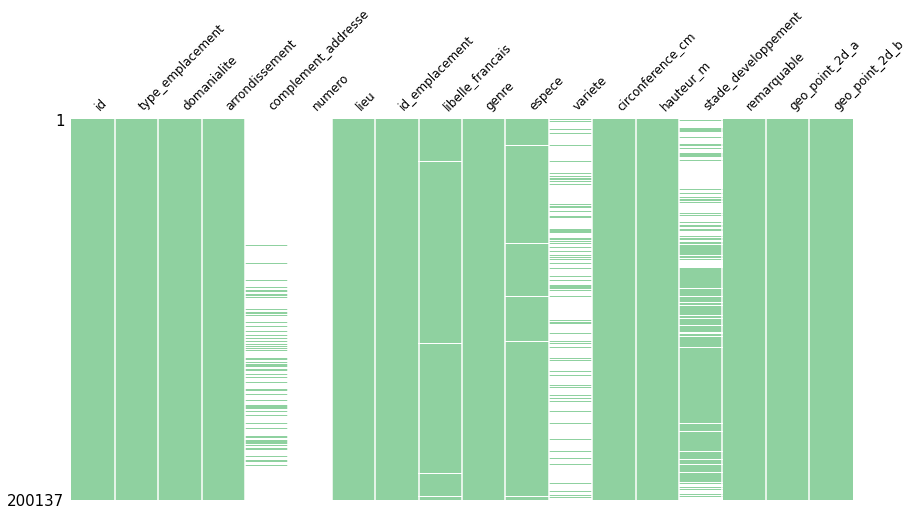

In [26]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

Regardons la colonne variete et stade_developpement

In [27]:
data.variete.unique()

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'",
       "Aspleniifolia'", "Jacquemontii'", "Fastigiata'",
       "Fastigiate Koster'", "Imperialis'", "Honey Dew'",
       "Jacqueline Hillier'", "Rubra Plena'", "Diversifolia'",
       "Flamingo'", "Argentea Marginata'", "Pendula'", "Liempde'",
       "Pyramidalis'", "Tortuosa'", "Aurea'", "Frisia'", "Leopoldii'",
       "Aldenhamensis'", "Briotii'", "Kanzan'", "Variegata'", "Hizakura'",
       "Albomarginata'", "Bradford'", "Autumnalis Rosea'",
       "Atropurpurea'", "Castanaefolia'", "Eddie's White Wonder'",
       "Autumnalis'", "Heaven Scent'", "Schouten'", "Sundew'",
       "Leonard messel'", "Merrill'", "Plena'", "Unifolia'", "Accolade'",
       "Baumannii'", "Virginiana'", "Flying Dragon'", "Laciniata'",
       "Laciniatum'", "Globosum'", "Rohanii'", "Golden Hornet'",
       "Glauca'", "Youngii'", "Contorta'", "Umbraculifera'", "Jaspidea'"

In [28]:
data.variete.describe()

count          36777
unique           436
top       Baumannii'
freq            4538
Name: variete, dtype: object

Je ne pense pas que cela soit pertinent d'intégrer cette colonne dans l'analyse, 
il manque trop d'information pour la plupart des lignes de notre jeu de données. On a que 18% environ de données pour cette colonne.

In [171]:
#del data['variete']

In [ ]:
Regardons la colonne stade_developpement

In [32]:
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

On a les choix adulte, jeune, mature, jeune adulte.
Regardons le % de données que nous avons

In [34]:
data.stade_developpement.describe()

count     132932
unique         4
top            A
freq       64438
Name: stade_developpement, dtype: object

In [ ]:
Nous avons 66% environs des données remplies. Nous conservons la colonne telle quelle.

# Démarche méthodologique d’analyse de données 

vérifier les données manquantes
vérifier les données dites aberrantes
regarder les tendances centrales : moyenne, mediane...
la dispersion : variance, ecart-type..
la forme des données: asymetrie...
regarder les correlations ? stats bi variée ?

Maintenant que nous avons traité les doublons et les valeurs manquantes. Nous allons étudier nos variables quantitatives : circonference_cm et hauteur_m.

## 1) Etude des variables quantitatives

Le but ici est d'étudier chaque variable afin de découvrir les informations qu'elles peuvent nous apporter et de detecter les éventuelles valeurs anodines dites "valeurs aberrantes"

Regardons nos variables quantitatives de manière générale.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     198640 non-null  object 
 7   genre                200121 non-null  object 
 8   espece               198385 non-null  object 
 9   circonference_cm     200137 non-null  int64  
 10  hauteur_m            200137 non-null  int64  
 11  stade_developpement  132932 non-null  object 
 12  remarquable          200137 non-null  float64
 13  geo_point_2d_a       200137 non-null  float64
 14  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), in

In [48]:
data[["circonference_cm", "hauteur_m"]].describe().round(2)

,circonference_cm,hauteur_m
count,200137.00,200137.00
mean,83.38,13.11
std,673.19,1971.22
min,0.00,0.00
25%,30.00,5.00
50%,70.00,8.00
75%,115.00,12.00
max,250255.00,881818.00


On voit qu'en moyenne un arbre a une circonference de 83 cm et une hauteur de 13 mètres.
50% des arbres ont au moins une circonférence de 70 cm et 50% des arbres ont au moins une hauteur de 8 mètre.
Les données sont très dispersées pour ces deux colonnes. 
Vérifions cela en traçant les boites à moustache.

Text(0.5, 1.0, 'Boite à moustache - "Circonference_cm"')

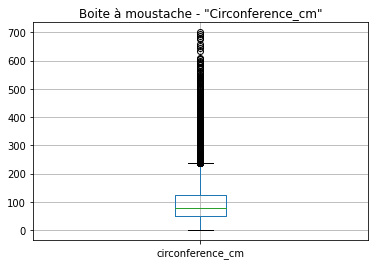

In [106]:
data.boxplot(column="circonference_cm").set_title('Boite à moustache - "Circonference_cm"')

On observe des valeurs très extrêmes. 
Si on fait une recherche sur internet, on sait que :
L'arbre avec la plus grande circonférence connue aujourd'hui à Paris est un platane d’Orient du Parc Monceau.
son tronc mesure 7 mètres de circonférence pour une hauteur de 31 mètres environ.
info sur : https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
Nous pouvons supprimer les données supérieurs à 701 cm.

In [57]:
data = data.loc[data["circonference_cm"] <= 701]

In [10]:
data[["circonference_cm", "hauteur_m"]].describe().round(2)

,circonference_cm,hauteur_m
count,200055.00,200055.00
mean,79.62,13.11
std,62.91,1971.62
min,0.00,0.00
25%,30.00,5.00
50%,70.00,8.00
75%,115.00,12.00
max,700.00,881818.00


Text(0.5, 1.0, 'Boîte à moustache - "Circonference_cm"')

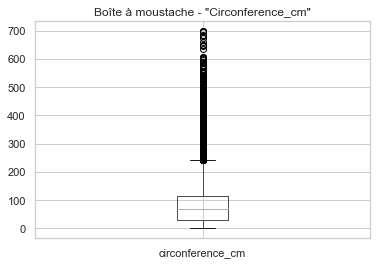

In [383]:
data.boxplot(column="circonference_cm" ).set_title('Boîte à moustache - "Circonference_cm"')

Nous observons encore des données qui sortent de l'ordinaire mais elles sont cohérentes. Nous les conservons pour ne pas perdre d'informations.

Nous observons que le minimum est 0. Ceci parait étonnant qu'un arbre ne puisse pas avoir de circonférence. 
Nous ne trouvons pas de données sur internet concernant l'arbre le plus fin à Paris.
Nous pouvons utiliser la formule de IQR pour supprimer les données dites "aberrantes".

In [390]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    print(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [391]:
outliers(data.circonference_cm)

30.0


,sub,values
0,IQR,85.000000
1,Upper Bound,242.500000
2,Lower Bound,-97.500000
3,Sum outliers,3327.000000
4,percentage outliers,1.663317


Concernant la valeur 0 de l'arbre le plus fin, selon la formule du IQR, on n'a pas de valeur aberrante.
Nous allons donc simplement supprimer les données à 0 qui ne sont pas possible pour un arbre.

In [58]:
data = data.loc[data["circonference_cm"] > 0]

In [119]:
data["circonference_cm"].describe().round(2)

count    159996.00
mean         92.45
std          58.86
min           1.00
25%          50.00
50%          80.00
75%         125.00
max         700.00
Name: circonference_cm, dtype: float64

Text(0.5, 1.0, 'Boîte à moustache - "Circonference_cm"')

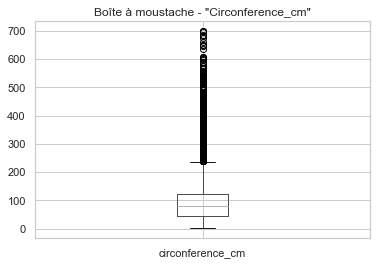

In [393]:
data.boxplot(column="circonference_cm" ).set_title('Boîte à moustache - "Circonference_cm"')

Nous observons que les valeurs sont aussi très dispersées. Nous avons beaucoup de valeurs extrêmes.
75% des arbres ont une circonférence en dessous de 122 cm.

In [395]:
scipy.stats.normaltest(data.circonference_cm)

NormaltestResult(statistic=43529.74434735392, pvalue=0.0)

In [171]:
def graph_hist(var, bins_r, title_i, xmin,xmax, xscale, ymin, ymax, xlabel, ylabel):
    plt.hist(var,bins=bins_r)
    plt.title(title_i)
    plt.xlim(xmin, xmax, xscale)
    plt.ylim(ymin,ymax)
    # Etiquetage
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

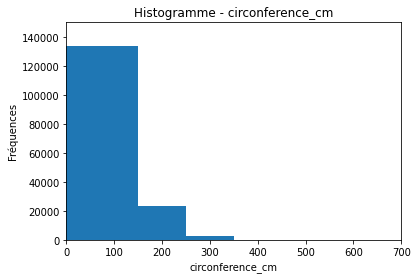

In [172]:
graph_hist(data.circonference_cm, [0,150,250,350,450,700], "Histogramme - circonference_cm", 
           0,700, 150, 0, 150000, 'circonference_cm', 'Fréquences')

Il serait judicieux de faire des intervalles. On ajoute une colonne avec un reg_circonference_cm.

In [204]:
def reg_cir(x):
    if x<150:
        return "[0-150["
    elif x>150 and x<250:
        return "[150-250["
    elif x>=250:
        return "250 et plus"



In [205]:
data['reg_circonference_cm']=data.apply(lambda row: reg_cir(row.circonference_cm), axis=1)


In [206]:
data['reg_circonference_cm'].describe()

count      157512
unique          3
top       [0-150[
freq       133954
Name: reg_circonference_cm, dtype: object

Regardons à présent la variable hauteur_m

In [207]:
data['reg_circonference_cm'].value_counts(normalize=True)

[0-150[        0.850437
[150-250[      0.131933
250 et plus    0.017630
Name: reg_circonference_cm, dtype: float64

Ce regroupement semble cohérent.

<AxesSubplot:>

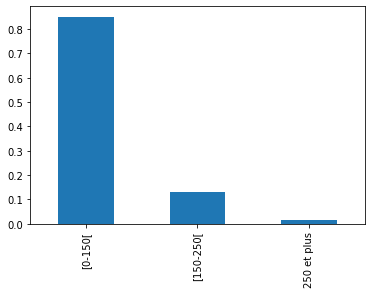

In [208]:
data['reg_circonference_cm'].value_counts(normalize=True).plot(kind='bar')

Etudions la variable hauteur_m. Faisons un violinplot.

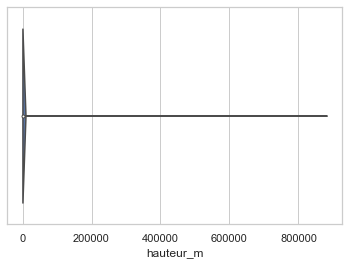

In [75]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=data["hauteur_m"])

Ici encore nous observons des valeurs aberrantes.
En effet, l'arbre le plus grand connu actuellement à Paris porte le nom de Séquoia. Il se trouve aux Buttes-Chaumont et mesure 35 mètres.
https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
Nous pouvons supprimer les données supérieures à 40 mètres.

In [189]:
data = data.loc[data["hauteur_m"] <= 40]

In [192]:
data["hauteur_m"].describe().round(2)

count    159996.00
mean         10.37
std           5.15
min           1.00
25%           6.00
50%          10.00
75%          14.00
max          40.00
Name: hauteur_m, dtype: float64

Le minimum est 0, ce qui n'est pas possible pour un arbre.
Regardons l'IQR.

In [401]:
outliers(data.hauteur_m)

5.0


,sub,values
0,IQR,8.00000
1,Upper Bound,25.00000
2,Lower Bound,-7.00000
3,Sum outliers,906.00000
4,percentage outliers,0.52155


Les données dites aberrantes sont celles inférieures à -7.
Nous pouvons donc uniquement supprimer les données à 0.

In [60]:
data = data.loc[data["hauteur_m"] > 0]

In [403]:
data["hauteur_m"].describe().round(2)

count    159996.00
mean         10.37
std           5.15
min           1.00
25%           6.00
50%          10.00
75%          14.00
max          40.00
Name: hauteur_m, dtype: float64

25 % des arbres ont une hauteur au dessus de 14 mètres.
L'ecart-type est de 5, les données sont peu dispersées.
Retraçons le boxplot

<AxesSubplot:>

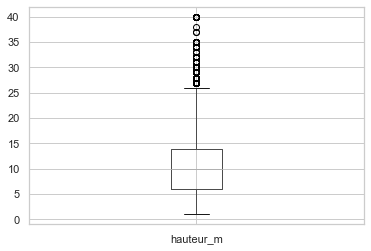

In [404]:
data.boxplot(column="hauteur_m" )

Nous pouvons donc confirmer que nos données sont moins dispersées sans les données aberrantes.

In [405]:
scipy.stats.normaltest(data.hauteur_m)

NormaltestResult(statistic=15866.540147621814, pvalue=0.0)

<AxesSubplot:>

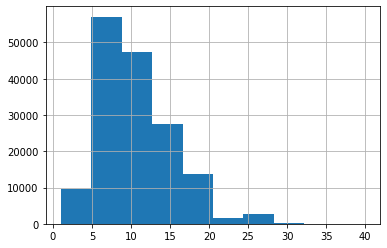

In [104]:
data.hauteur_m.hist()

Il serait judicieux de regrouper les données et de faire des intervalles afin quelles soient plus pertinentes.
Tout comme pour la variable circonference_cm, faisons un regroupement pour la variable hauteur_m. Creons une colonne Reg_hauteur_m.

In [198]:
def reg_haut(x):
    if x<10:
        return "[0-10["
    elif x>=10 and x<15:
        return "[10-15["
    elif x>=15 and x<20:
        return "[15-20["
    elif x>=20:
        return "20 et plus"


In [199]:
data['reg_hauteur_m']=data.apply(lambda row: reg_haut(row.hauteur_m), axis=1)

Regardons les proportions pour la nouvelle colonne.

In [201]:
data['reg_hauteur_m'].value_counts(normalize=True)

[0-10[        0.446330
[10-15[       0.309714
[15-20[       0.167985
20 et plus    0.075971
Name: reg_hauteur_m, dtype: float64

Ce regroupement semble convenable

<AxesSubplot:>

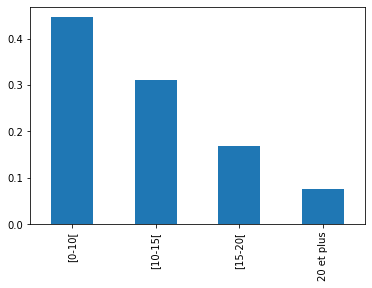

In [202]:
data["reg_hauteur_m"].value_counts(normalize=True).plot(kind='bar')

## 2) Variables qualitatives

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200086 entries, 0 to 200136
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200086 non-null  int64  
 1   domanialite          200085 non-null  object 
 2   arrondissement       200086 non-null  object 
 3   lieu                 200086 non-null  object 
 4   id_emplacement       200086 non-null  object 
 5   libelle_francais     198589 non-null  object 
 6   genre                200070 non-null  object 
 7   espece               198334 non-null  object 
 8   circonference_cm     200086 non-null  int64  
 9   hauteur_m            200086 non-null  int64  
 10  stade_developpement  132881 non-null  object 
 11  remarquable          200086 non-null  float64
 12  geo_point_2d_a       200086 non-null  float64
 13  geo_point_2d_b       200086 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 22.9+ MB


data.type_emplacement.unique()
Nous avons une seule données pour cette variable.
Nous pouvons la supprimer, elle n'apporte aucune information.

In [61]:
del data['type_emplacement']

In [88]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,200085,200086,200086,198589,200070,198334,200086.00
unique,9,25,6921,192,175,539,NaN
top,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,Platanus,x hispanica,NaN
freq,104903,17149,2995,42490,42573,36400,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.00
std,NaN,NaN,NaN,NaN,NaN,NaN,0.03
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


Nous allons transformer la variable "remarquable" qui prend comme valeur 0/1 en oui/non.

In [62]:
data['remarquable'] = data['remarquable'].replace(0,'Non')
data['remarquable'] = data['remarquable'].replace(1,'Oui')

In [101]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,200085,200086,200086,198589,200070,198334,200086
unique,9,25,6921,192,175,539,2
top,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,Platanus,x hispanica,Non
freq,104903,17149,2995,42490,42573,36400,199902


<AxesSubplot:>

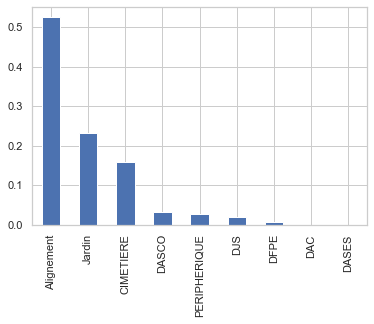

In [106]:
data["domanialite"].value_counts(normalize=True).plot(kind='bar')

Plus de 50% des arbres se trouve dans un alignement.
un peu plus de 20% se trouve dans des jardins et un peu moins de 20% dans des cimetières.
Les autres catégories sont très peu représentées. Il serait peut être judicieux de les regrouper dans une catégorie "Autres".

In [107]:
data["domanialite"].value_counts(normalize=True)

Alignement      0.524292
Jardin          0.231202
CIMETIERE       0.159557
DASCO           0.032086
PERIPHERIQUE    0.026624
DJS             0.019492
DFPE            0.006622
DAC             0.000105
DASES           0.000020
Name: domanialite, dtype: float64

In [63]:
replace_values = {'Alignement':'Alignement', 'Jardin':'Jardin','CIMETIERE':'CIMETIERE', 'DASCO' : 'Autres', 'PERIPHERIQUE' : 'Autres', 'DJS' : 'Autres', 'DFPE': 'Autres', 'DAC':'Autres', 'DASES':'Autres' }  

In [64]:
data['domanialite'] = data['domanialite'].map(replace_values)     

In [65]:
data["domanialite"].value_counts(normalize=True)

Alignement    0.622319
Jardin        0.168262
CIMETIERE     0.106353
Autres        0.103066
Name: domanialite, dtype: float64

In [66]:
max(data["lieu"].value_counts(normalize=True))


0.01018150453761344

In [67]:
min(data["lieu"].value_counts(normalize=True))

6.250156253906348e-06

Les données sont très dispersées dans les différentes catégories.
Pertinence ?

<AxesSubplot:>

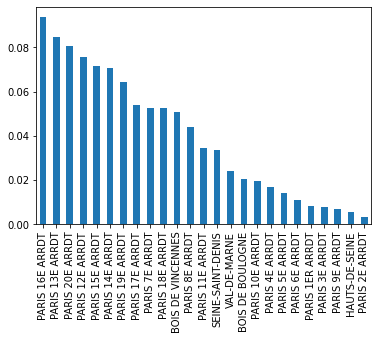

In [68]:
data["arrondissement"].value_counts(normalize=True).plot(kind='bar')

In [69]:
data["libelle_francais"].value_counts(normalize=True)

Platane         0.246982
Marronnier      0.143502
Tilleul         0.109796
Erable          0.078348
Sophora         0.065734
                  ...   
Grenadier       0.000006
Cordyline       0.000006
Papayer         0.000006
Poliothyrsis    0.000006
Idesia          0.000006
Name: libelle_francais, Length: 169, dtype: float64

In [70]:
data["libelle_francais"].value_counts(normalize=True).head(20)

Platane                 0.246982
Marronnier              0.143502
Tilleul                 0.109796
Erable                  0.078348
Sophora                 0.065734
Frêne                   0.021811
Micocoulier             0.020588
Peuplier                0.017909
Noisetier de Byzance    0.017366
Chêne                   0.017240
Pin                     0.017114
Poirier à fleurs        0.015936
Charme                  0.014914
Cerisier à fleurs       0.014568
Robinier                0.012179
Orme                    0.009764
If                      0.008340
Bouleau                 0.008138
Paulownia               0.007552
Faux-cyprès             0.007022
Name: libelle_francais, dtype: float64

In [ ]:
On observe plusieurs sauts dont un entre ribinier et Orme.
nous pouvons regrouper les catégories qui représentent moins d'un pourcent des arbres.

In [71]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)

In [72]:
info_lib.value_counts(normalize=True)

False    0.911243
True     0.088757
Name: libelle_francais, dtype: float64

90% des catégories représentent moins de 1% les arbres.
Les données sont très dispersées.
On peut faire un regroupement Autres

In [358]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)

In [73]:
info_lib=list(info_lib.loc[info_lib== True].index)

In [74]:
def map_lib(lib):
    if lib in info_lib:
        return lib
    else:
        return "Autres"

In [77]:
data["libelle_francais"]=data["libelle_francais"].map(map_lib, na_action=None)

In [78]:
data["libelle_francais"]

0         Marronnier
1             Autres
2             Autres
3             Erable
7            Platane
             ...    
198874         Chêne
198875         Chêne
198876         Chêne
198877         Chêne
198878         Chêne
Name: libelle_francais, Length: 159996, dtype: object

In [79]:
data["libelle_francais"].value_counts(normalize=True)

Platane                 0.244887
Autres                  0.192917
Marronnier              0.142285
Tilleul                 0.108865
Erable                  0.077683
Sophora                 0.065177
Frêne                   0.021626
Micocoulier             0.020413
Peuplier                0.017757
Noisetier de Byzance    0.017219
Chêne                   0.017094
Pin                     0.016969
Poirier à fleurs        0.015800
Charme                  0.014788
Cerisier à fleurs       0.014444
Robinier                0.012075
Name: libelle_francais, dtype: float64

In [80]:
data["libelle_francais"].describe(include='all')

count      159996
unique         16
top       Platane
freq        39181
Name: libelle_francais, dtype: object

<AxesSubplot:>

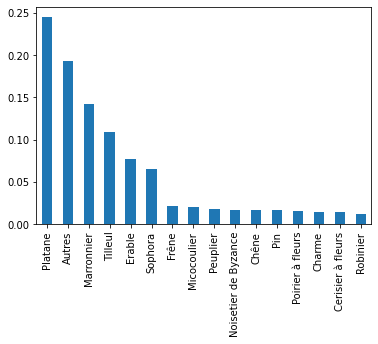

In [81]:
data["libelle_francais"].value_counts(normalize=True).plot(kind='bar')

In [ ]:
on conserve 16 catégories.

In [88]:
data["genre"].value_counts(normalize=True).head(20)

Platanus    0.245375
Autres      0.154048
Aesculus    0.143116
Tilia       0.110365
Acer        0.078177
Sophora     0.065302
Prunus      0.031482
Fraxinus    0.025488
Celtis      0.020876
Pyrus       0.018763
Populus     0.017982
Corylus     0.017625
Quercus     0.017188
Pinus       0.017050
Carpinus    0.014932
Robinia     0.012150
Ulmus       0.010082
Name: genre, dtype: float64

In [83]:
info_g=(data["genre"].value_counts(normalize=True)>0.01)

In [84]:
info_g.value_counts(normalize=True)

False    0.890411
True     0.109589
Name: genre, dtype: float64

In [85]:
def map_lib(lib):
    if lib in info_g:
        return lib
    else:
        return "Autres"
    
info_g=(data["genre"].value_counts(normalize=True)>0.01)
info_g=list(info_g.loc[info_g== True].index)
data["genre"]=data["genre"].map(map_lib, na_action=None)

In [89]:
data["genre"].describe()

count       159996
unique          17
top       Platanus
freq         39259
Name: genre, dtype: object

<AxesSubplot:>

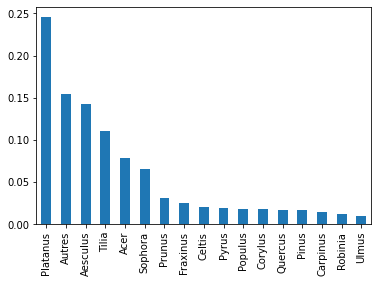

In [87]:
data["genre"].value_counts(normalize=True).plot(kind='bar')

In [91]:
data["espece"].value_counts(normalize=True).head(25)

x hispanica       0.213598
hippocastanum     0.113264
japonica          0.065691
tomentosa         0.051408
n. sp.            0.050425
platanoides       0.029530
pseudoplatanus    0.028522
x carnea          0.025581
x europaea        0.022804
nigra             0.022457
australis         0.020461
occidentalis      0.020373
cordata           0.019164
colurna           0.017407
excelsior         0.016015
calleryana        0.015058
betulus           0.014988
orientalis        0.013049
pseudoacacia      0.012142
platyphyllos      0.010725
serrulata         0.009062
baccata           0.008344
campestre         0.007186
alba              0.006657
sinensis          0.005939
Name: espece, dtype: float64

In [92]:
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e.value_counts(normalize=True)

False    0.946809
True     0.053191
Name: espece, dtype: float64

In [93]:
def map_lib_e(lib):
    if lib in info_e:
        return lib
    else:
        return "Autres"
    
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e=list(info_e.loc[info_e== True].index)
data["espece"]=data["espece"].map(map_lib_e, na_action=None)

In [94]:
data['espece'].describe()

count     159996
unique        21
top       Autres
freq       35718
Name: espece, dtype: object

<AxesSubplot:>

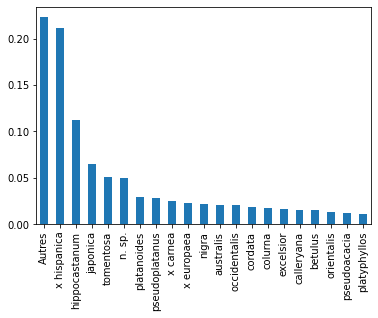

In [95]:
data["espece"].value_counts(normalize=True).plot(kind='bar')

Text(0.5, 1.0, 'Diagramme circulaire - Variable Remarquable')

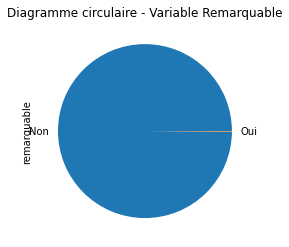

In [209]:
data["remarquable"].value_counts(normalize=True).plot(kind='pie').set_title("Diagramme circulaire - Variable Remarquable")

Il y a très peu d'arbres remarquable à Paris.

## 3) Visualisation des données sur la carte de Paris

Le but étant d'obtenir une information supplémentaire sur la manière dont nos données sont réparties.

In [40]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

In [41]:
paris

In [30]:
geo = json.load(open("arrondissements.geojson"))

In [31]:
geo.keys()

dict_keys(['type', 'features'])

In [32]:
geo["type"]

'FeatureCollection'

In [33]:
len(geo["features"])

20

In [42]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)


In [43]:
paris.choropleth( geo)


In [44]:
paris

In [ ]:
une couleur par arrondissement et cercle aevc le nombre d'arbre ?

In [212]:
df = pd.DataFrame({
    "Arrondissement" : [arr["properties"]["c_ar"] for arr in geo["features"]], 
    "Surface" : [arr["properties"]["surface"] for arr in geo["features"]]
})
df

,Arrondissement,Surface
0,16,1.637254e+07
1,19,6.792651e+06
2,3,1.170883e+06
3,11,3.665442e+06
4,5,2.539375e+06
5,6,2.153096e+06
6,9,2.178303e+06
7,20,5.983446e+06
8,15,8.494994e+06
9,2,9.911537e+05


In [216]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df, columns = ["Arrondissement", "Surface"],
                 fill_color = "Spectral").add_to(paris)
paris

# Synthèse de l’analyse de données

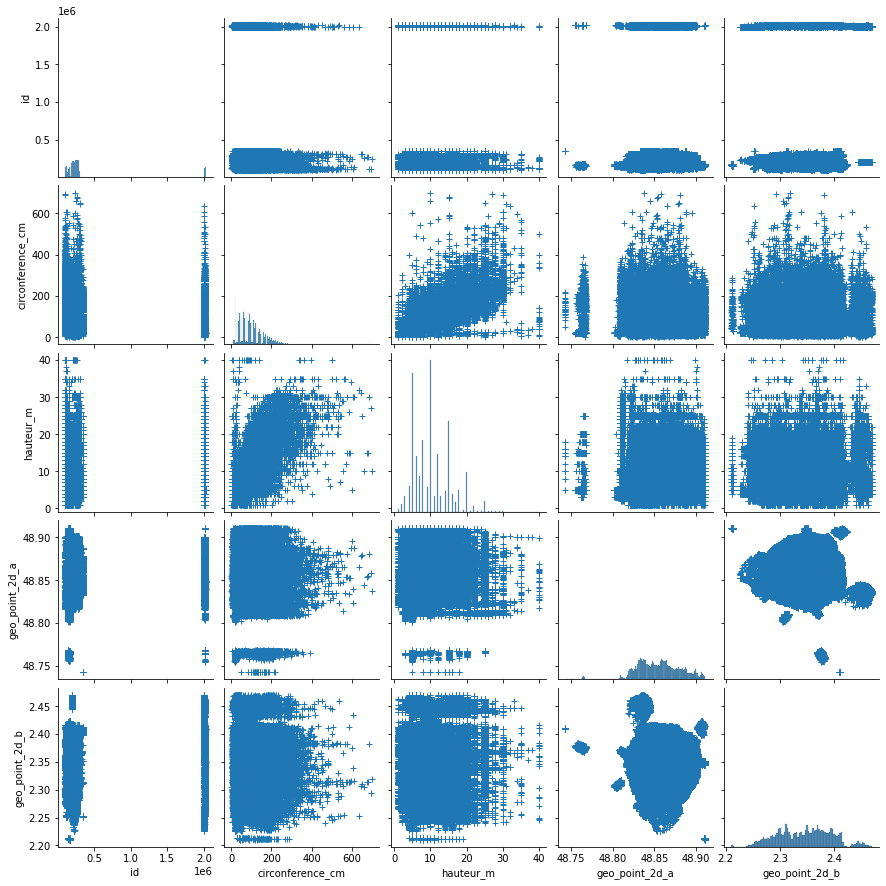

In [210]:
sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1))


In [ ]:

La hauteur et la circonférence des arbres semble liées : 
Plus un arbre est fin et plus il est haut . Plus un arbre est gros et plus il est haut.

On peut aussi observer la carte de paris avec le croisement des points geo a et b.